In [41]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
dataset = openml.datasets.get_dataset(712)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,col_1,col_2
0,1,4.4
1,1,3.9
2,1,4.0
3,1,4.0
4,1,3.5


In [43]:
y.head()

0    78
1    74
2    68
3    76
4    80
Name: col_3, dtype: uint8

In [44]:
# function_set = ['add', 'sub', 'mul', 'div',
#                 'sqrt', 'log', 'abs', 'neg', 'inv',
#                 'max', 'min']
# transformer = SymbolicTransformer(generations=20,
#                                   population_size=5000,
#                                   hall_of_fame=100,
#                                   n_components=10,
#                                   function_set=function_set,
#                                   parsimony_coefficient=0.0001,
#                                   max_samples=0.9,
#                                   verbose=1,
#                                   random_state=42,
#                                   n_jobs=-1)
#
# transformer.fit(X, y)

In [45]:
# X_transformed = transformer.transform(X)
# X = np.hstack((X, X_transformed))
# X = pd.DataFrame(X)
# X.head()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.1,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    37.44      1.12546e+22        7          152.979          267.986     11.88s
   1    23.07      1.50937e+09        9          159.437           164.99     35.65s
   2    31.75      3.97199e+11       19          95.7896          52.4391     39.64s
   3    34.95       2.3095e+13        9          71.8979          89.9604     56.92s
   4    45.88      1.39011e+07       13          43.8211          52.9857     41.10s
   5    25.60       6.7757e+06       13          45.9917          34.1281     37.27s
   6    23.74      1.33543e+07       13          42.6727          62.9626     34.40s
   7    19.24      2.16198e+07       13          39.6145          89.5307     31.69s
   8    21.64      3.81279e+11       15          39.2589          78.3035  

SymbolicRegressor(max_samples=0.9, metric='mse', n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [48]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

182    79.414227
135    56.821578
86     50.734752
65     73.956328
207    49.110304
dtype: float64

In [49]:
y_train.head()

182    82
135    58
86     61
65     72
207    51
Name: col_3, dtype: uint8

In [50]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

154    80.801177
215    50.732494
15     75.561856
173    65.937376
158    80.801177
dtype: float64

In [51]:
y_test.head()

154    81
215    52
15     80
173    60
158    94
Name: col_3, dtype: uint8

In [52]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.7559273419896484
R2 Score of test samples whit the model:  0.8162798532196283


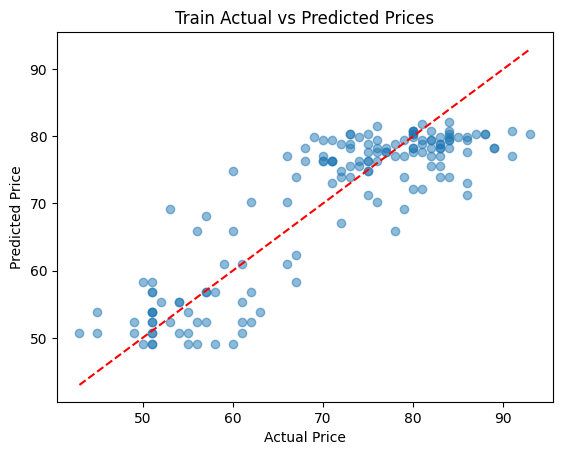

In [53]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

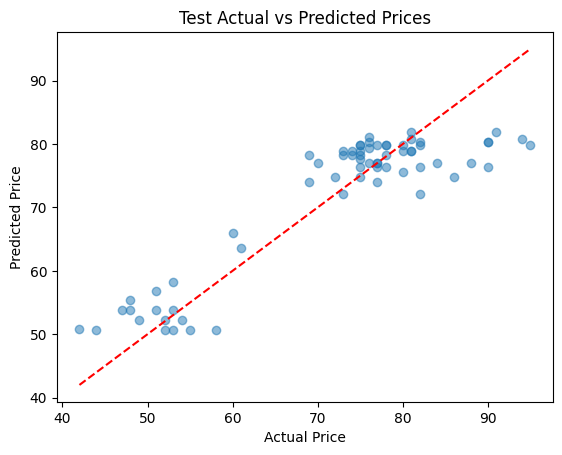

In [54]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()